In [1]:
from google.colab import files
info = files.upload()

Saving housing_california (1).csv to housing_california (1).csv


In [2]:
import pandas as pd
df = pd.read_csv('housing_california (1).csv')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
df. head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


=> The dataset comprises 20,640 entries and 10 columns, including geographical coordinates, housing age, room/bedroom counts, population, income, the target variable median_house_value, and ocean_proximity.

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.shape

(20640, 10)

In [9]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


 => The ocean_proximity feature was identified as categorical (object type). A key finding was the presence of 207 missing values in the total_bedrooms column, necessitating imputation.

In [10]:
df.duplicated().sum()

np.int64(0)

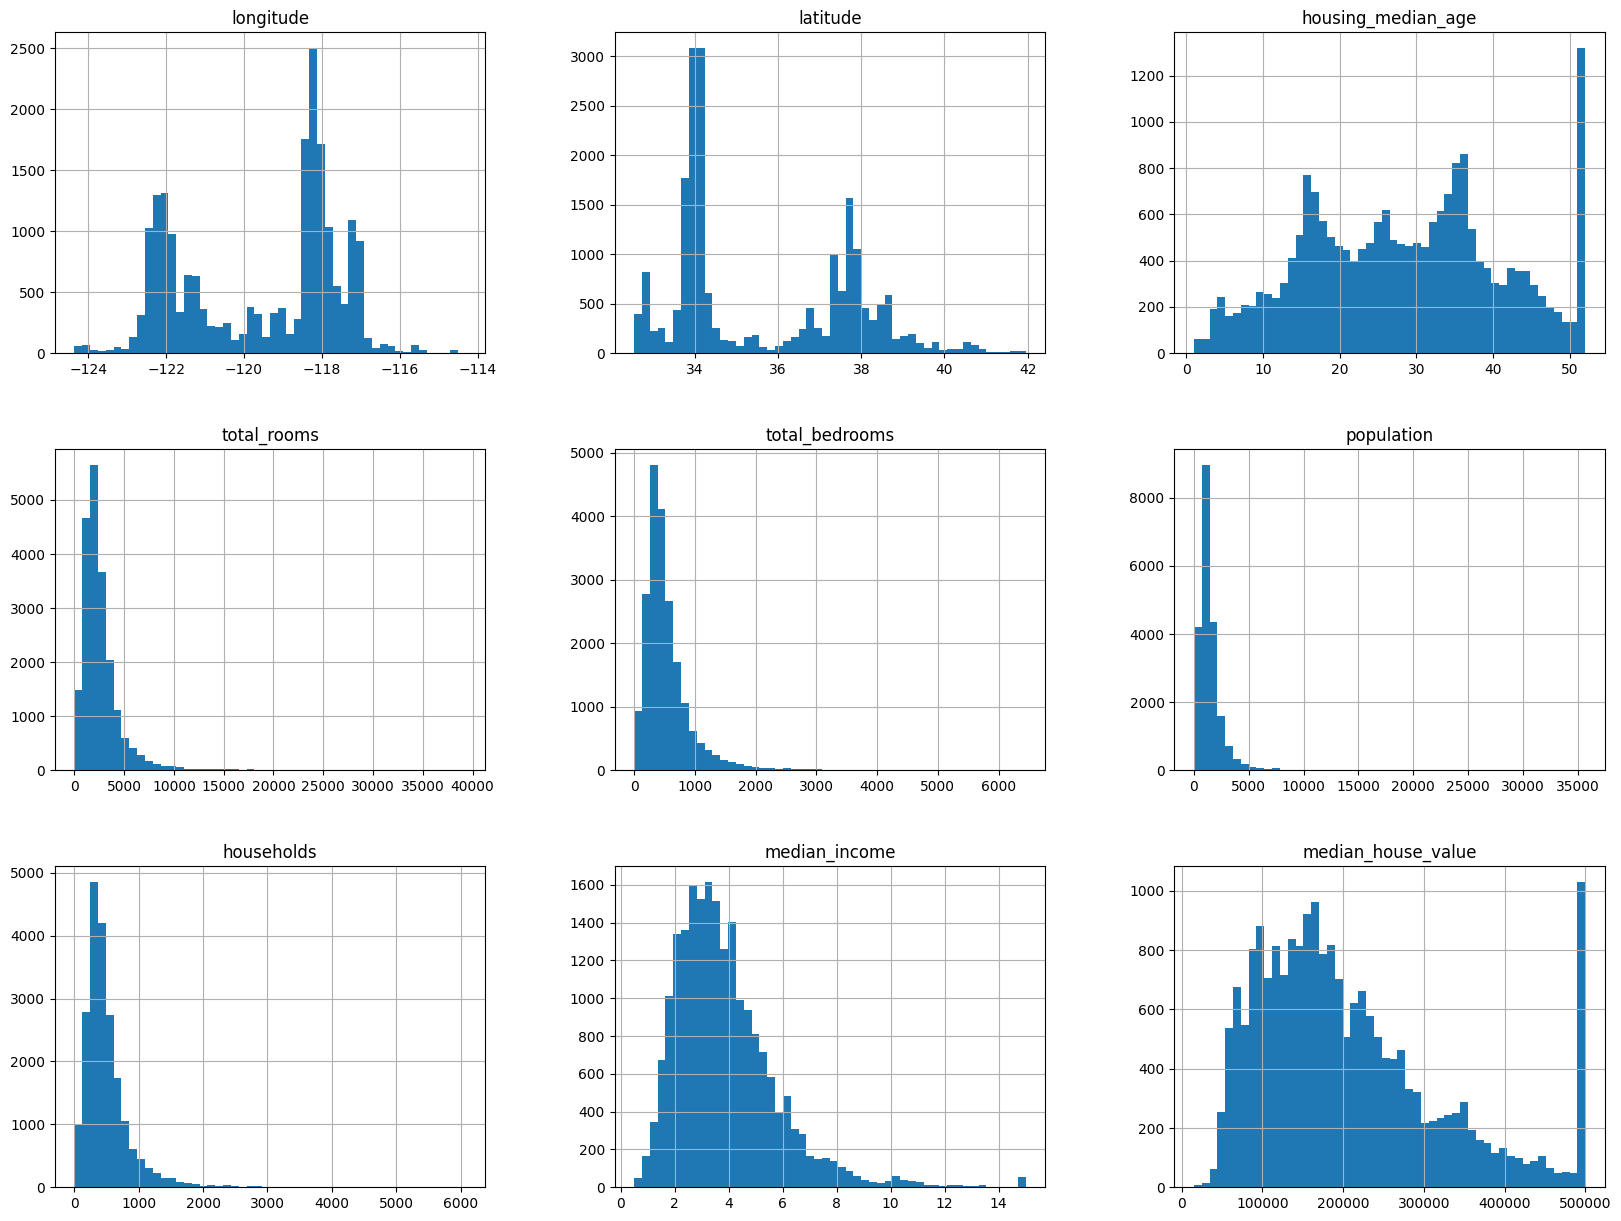

In [11]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

=> Many features like 'total_rooms', 'total_bedrooms', 'population', 'households' are heavily right-skewed.
'housing_median_age' also shows a peak at its max value, similar to the target. 'median_income' is measured in tens of thousands of dollars and seems capped at 15.

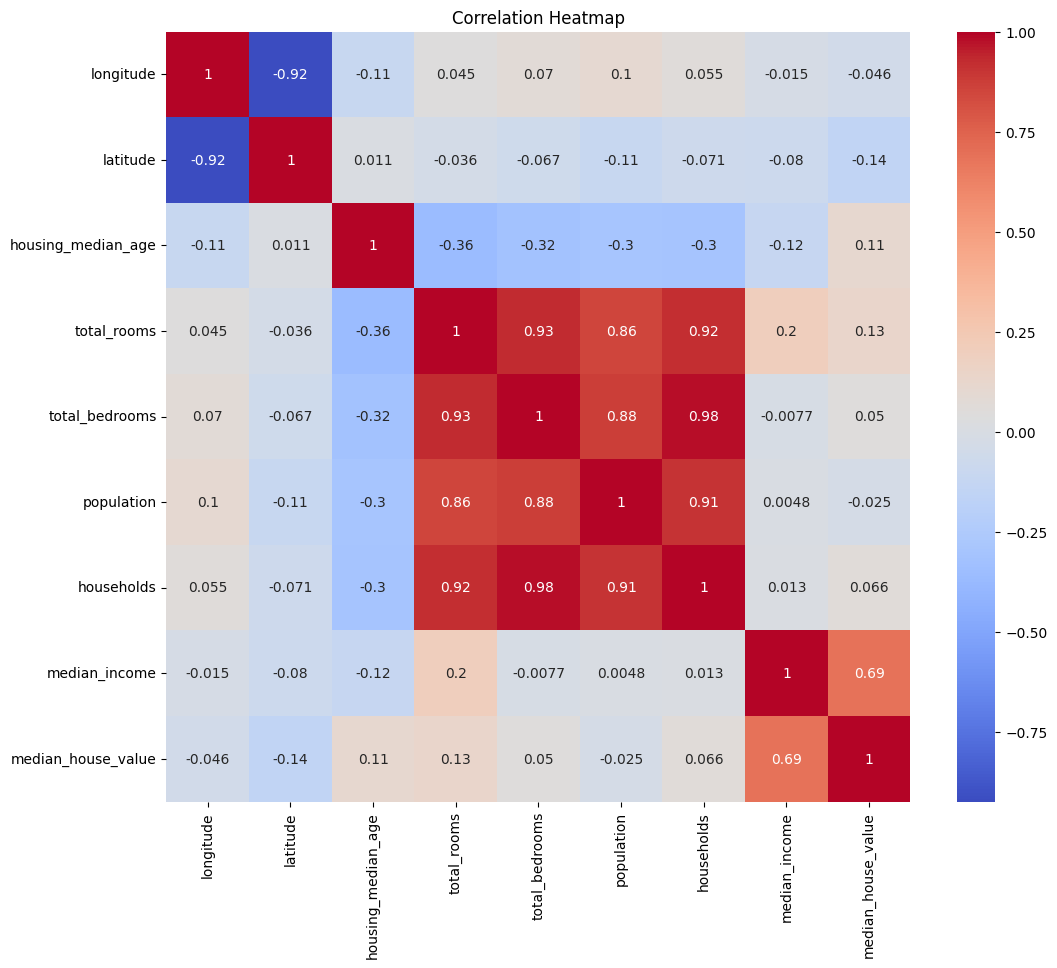

In [12]:
plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

=> 'median_income' has the strongest positive correlation with 'median_house_value'.
- 'total_rooms' and related features ('total_bedrooms', 'population', 'households') show some positive correlation, but weaker. Note these are *total* figures per block group, not per household. Creating features like 'rooms_per_household' or 'bedrooms_per_room' might be beneficial (Feature Engineering - not explicitly done here but good next step).
- 'housing_median_age' has a weak positive correlation.
- 'latitude' shows a slight negative correlation (prices tend lower further north).
- High correlation between 'total_bedrooms' and 'total_rooms', and 'population' and 'households' is expected.


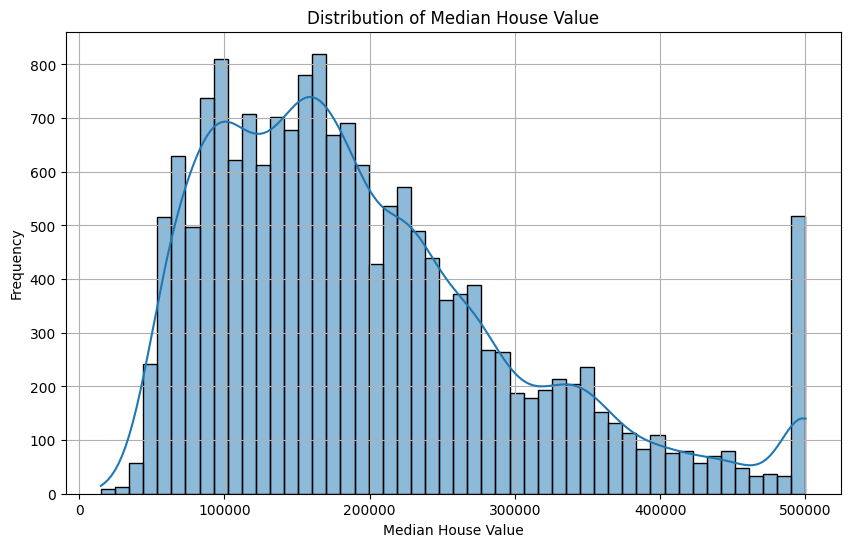

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

=>  The distribution is right-skewed. There's a noticeable peak at the maximum value ($500,000), confirming the cap. This might affect model performance, especially for predicting high-value homes.

In [24]:
print("Value counts for 'ocean_proximity':")
print(df['ocean_proximity'].value_counts())

Value counts for 'ocean_proximity':
ocean_proximity
<1H OCEAN     7496
INLAND        5680
NEAR OCEAN    2238
NEAR BAY      1938
ISLAND           5
Name: count, dtype: int64


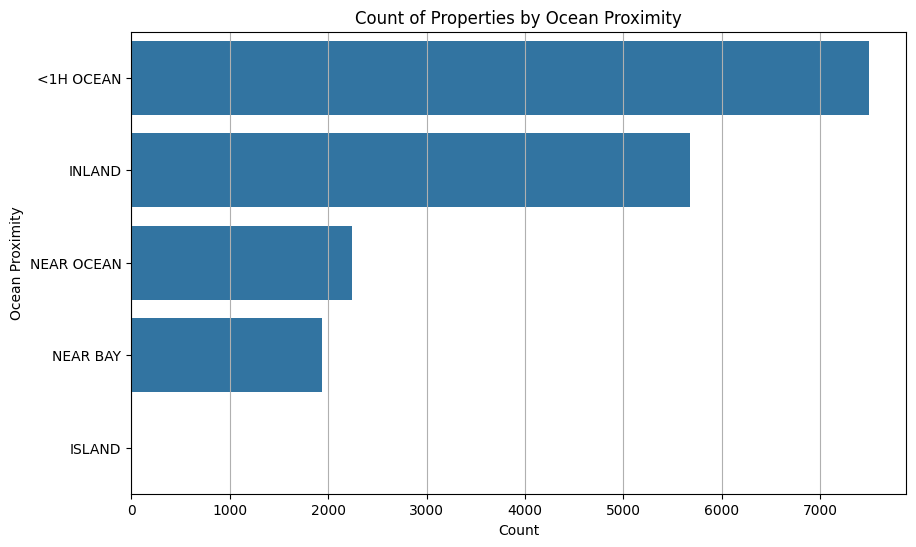

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(y='ocean_proximity', data=df, order=df['ocean_proximity'].value_counts().index)
plt.title('Count of Properties by Ocean Proximity')
plt.xlabel('Count')
plt.ylabel('Ocean Proximity')
plt.grid(axis='x')
plt.show()

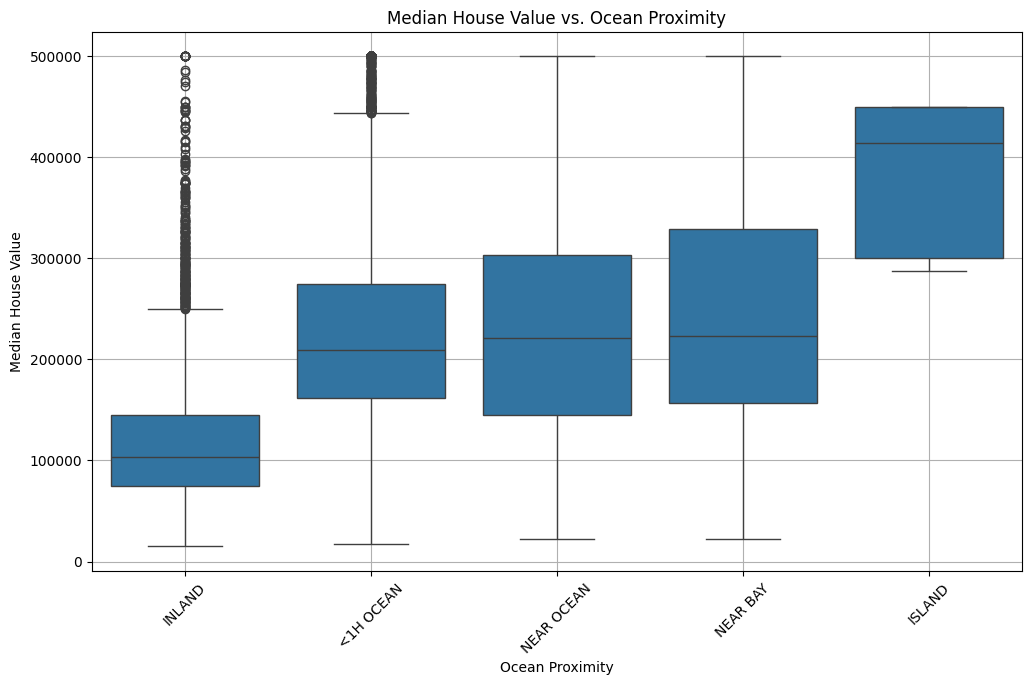

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, order=df.groupby('ocean_proximity')['median_house_value'].median().sort_values().index)
plt.title('Median House Value vs. Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

=> Most properties are '<1H OCEAN'. 'INLAND' is the next most common. 'ocean_proximity' clearly influences 'median_house_value'.
'NEAR BAY' and 'NEAR OCEAN' tend to have higher median values, while 'INLAND' has lower values.

In [14]:
df = df.dropna(subset=['total_bedrooms'])

In [15]:
def remove_outliers_iqr(data, columns, factor=1.5):
    data_cleaned = data.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(data_cleaned[col]):
            Q1 = data_cleaned[col].quantile(0.25)
            Q3 = data_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]
    return data_cleaned

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('median_house_value')
df = remove_outliers_iqr(df, numerical_cols)

In [16]:
# Feature Engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [17]:
# Log Transformation (if needed)
for col in ['population', 'median_income', 'total_rooms', 'total_bedrooms', 'households']:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]) and df[col].skew() > 1:
        df[col] = np.log1p(df[col])

# Encode categorical variable 'ocean_proximity'
encoder = LabelEncoder()
df['ocean_proximity_encoded'] = encoder.fit_transform(df['ocean_proximity'])

In [18]:
# Select features and target
X = df.drop(columns=['median_house_value', 'ocean_proximity'])
y = df['median_house_value']

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Training and Evaluation (Cross-Validation)

In [20]:
#Linear Regression
lin_reg = LinearRegression()
lin_rmse_scores = -cross_val_score(lin_reg, X_train_scaled, y_train,
                                     scoring="neg_root_mean_squared_error", cv=10)

print("\nLinear Regression")
print("RMSE Scores:", lin_rmse_scores)
print("Mean RMSE:", lin_rmse_scores.mean())
print("Std Dev RMSE:", lin_rmse_scores.std())
print("\n")


Linear Regression
RMSE Scores: [67227.93720925 65436.36550435 65056.38495325 65968.62451363
 72752.11806361 63617.135669   63977.59813083 65514.95209789
 66377.22612718 62993.8837055 ]
Mean RMSE: 65892.22259744875
Std Dev RMSE: 2595.6560636349686




In [21]:
#Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_rmse_scores = -cross_val_score(tree_reg, X_train_scaled, y_train,
                                      scoring="neg_root_mean_squared_error", cv=10)

print("Decision Tree")
print("RMSE Scores:", tree_rmse_scores)
print("Mean RMSE:", tree_rmse_scores.mean())
print("Std Dev RMSE:", tree_rmse_scores.std())
print("\n")

Decision Tree
RMSE Scores: [69217.25482677 74588.8802816  71604.89379536 70749.85298886
 75776.97496191 71111.18360332 69659.36500282 70182.5715835
 72600.25344633 70123.0475081 ]
Mean RMSE: 71561.42779985846
Std Dev RMSE: 2048.460399234455




In [22]:
#Random Forest
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_rmse_scores = -cross_val_score(rf_reg, X_train_scaled, y_train,
                                    scoring="neg_root_mean_squared_error", cv=10)

print("Random Forest")
print("RMSE Scores:", rf_rmse_scores)
print("Mean RMSE:", rf_rmse_scores.mean())
print("Std Dev RMSE:", rf_rmse_scores.std())
print("\n")

Random Forest
RMSE Scores: [52254.12786716 50281.85661987 53348.28382778 49481.53787691
 54659.10654462 49862.20292177 48802.43394099 49427.46545998
 51686.71372093 47323.33657444]
Mean RMSE: 50712.70653544573
Std Dev RMSE: 2122.700861347733




In [32]:
results_test = {}

# Define the models dictionary here
models = {
    'Linear Regression': lin_reg,
    'Decision Tree': tree_reg,
    'Random Forest': rf_reg
}

# Calculate and store RMSE scores for each model on the test set
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results_test[model_name] = rmse

print("\nSelecting Best Model based on Test Set Performance")
best_model_name_test = min(results_test, key=results_test.get)
print(f"Best model based on Test Set RMSE: {best_model_name_test} (RMSE: {results_test[best_model_name_test]:.2f})")

final_model = models[best_model_name_test]
print(f"\nFinal selected model: {best_model_name_test}")


Selecting Best Model based on Test Set Performance
Best model based on Test Set RMSE: Random Forest (RMSE: 52029.05)

Final selected model: Random Forest
